In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pose

In [9]:
def image_count_in_folder(folder : str) -> int:
    return len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])

In [10]:
image_count_in_folder('../data/1_lie_on')

156

In [11]:
data_1_lie_on_count = image_count_in_folder('../data/1_lie_on')
data_2_side_count = image_count_in_folder('../data/2_side')
data_3_procumbent_count = image_count_in_folder('../data/3_procumbent')

data = {
    'Nằm ngửa': data_1_lie_on_count,
    'Nằm nghiêng về 1 bên': data_2_side_count,
    'Nằm sấp': data_3_procumbent_count
}

df = pd.DataFrame(data, index=[0])

<Axes: >

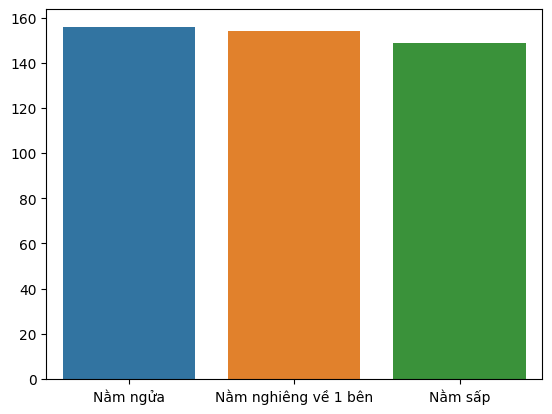

In [12]:
sns.barplot(data=df)

# 2. Infant cry

In [13]:
import wave
import contextlib

In [14]:
# lấy ra danh sách các file audio trong thư mục
def get_files_in_folder(folder: str) -> list:
    return [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

In [15]:
def get_duration_of_audio_file(file: str) -> float:
    with contextlib.closing(wave.open(file,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration

In [16]:
for file in get_files_in_folder('../data/infant_cry_audio/belly_pain'):
    file_name = os.path.join('../data/infant_cry_audio/belly_pain', file)
    with contextlib.closing(wave.open(file_name,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)

In [17]:
def get_duration_of_audio_files(folder: str, files: list) -> float:
    duration = 0
    for file in files:
        file_name = os.path.join(folder, file)
        with contextlib.closing(wave.open(file_name,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration += frames / float(rate)

    return duration

In [18]:
belly_pain_duration = get_duration_of_audio_files('../data/infant_cry_audio/belly_pain', get_files_in_folder('../data/infant_cry_audio/belly_pain'))
burping_duration = get_duration_of_audio_files('../data/infant_cry_audio/burping', get_files_in_folder('../data/infant_cry_audio/burping'))
discomfort_duration = get_duration_of_audio_files('../data/infant_cry_audio/discomfort', get_files_in_folder('../data/infant_cry_audio/discomfort'))
hungry_duration = get_duration_of_audio_files('../data/infant_cry_audio/hungry', get_files_in_folder('../data/infant_cry_audio/hungry'))
tired_duration = get_duration_of_audio_files('../data/infant_cry_audio/tired', get_files_in_folder('../data/infant_cry_audio/tired'))


In [19]:
belly_pain_duration

111.22

In [20]:
infant_cry_audio_df = pd.DataFrame({
    'Đau bụng': belly_pain_duration,
    'Ợ hơi': burping_duration,
    'Khó chịu': discomfort_duration,
    'Đói': hungry_duration,
    'Mệt mỏi': tired_duration
}, index=[0])

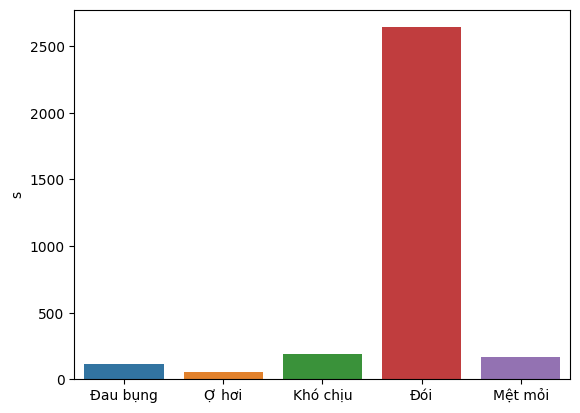

In [21]:
sns.barplot(data=infant_cry_audio_df)  # Chỉnh lại tên cột cho phù hợp

# Thêm nhãn cho trục y
plt.ylabel('s')  # Thay "Tên nhãn trục y" bằng tên nhãn bạn muốn đặt

# Hiển thị biểu đồ
plt.show()